# Primer Examen 15%
## Juan David Salcedo Hernández. 1001577699

A) Cargando el archivo JSON: 
* https://github.com/restrepo/anomaly/raw/main/solutions.json.gz

en Pandas

1) Adicione una columna nueva `'smax'` con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna '`solution`'

2) Adicione dos columnas nuevas: `'sum_s'` (`sum_s³`) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna '`solution`'

3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje $x$ y en el eje $y$ del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: `plt.ylim(ymin,ymax)` ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo


In [69]:
%config InlineBackend.figure_format = 'svg'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [70]:
path = 'https://github.com/restrepo/anomaly/raw/main/solutions.json.gz'
df = pd.read_json(path)
df.head()

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11


In [71]:
# new column with the maximum absolute value of the solutions list
df['smax'] = df['solution'].apply( lambda l : max(l, key=abs) )

# new column with the sum of the solutions
df['sum_s'] = df.apply(lambda row :
                       sum( row.get('solution') ),
                       axis = 'columns')

# new column with the sum of the cube of the solutions
df['sum_s3'] = df.apply(lambda row :
                        sum( map(lambda x : x**3, row.get('solution')) ),
                        axis = 'columns')
df.head()

,l,k,solution,gcd,n,smax,sum_s,sum_s3
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,-6,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,-8,0,0


In [80]:
# It should be easy to verify
# that neither sum_s nor sum_s3
# change, i.e., they are always 0

# this function returns a tuple with
# the names of the columns that do not change
tuple(df.apply(lambda column :
               column.name if np.all(np.array(column)[0] == np.array(column)) else None).dropna()
     )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


['sum_s', 'sum_s3']

In [83]:
# seed with my ID
np.random.seed(1001577699)

# random integer within the given range
index = np.random.randint(0, 390073, 1)

# we let the elements of the solution list
# be the coefficients of a polynomial.
# Notice that the list has been "flattened out"
def flatten(l):
    return [item for sublist in l for item in sublist]
coeff = flatten( list(df.iloc[index]['solution']) )

# define our polynomial
p = np.poly1d(coeff, r=False)

# find the roots of the polynomial
roots = p.roots

# filter the real roots thereof
r_roots = [r.real for r in roots if np.isreal(r)]

# print info.
print(f'Polynomial:\n{p}\nReal Roots: {r_roots}')

Polynomial:
   10     9      8      7      6      5      4      3      2
2 x  - 8 x + 11 x + 12 x + 12 x - 14 x - 18 x - 21 x - 21 x + 22 x + 23
Real Roots: [1.114044665297007, 0.9999999999999996]


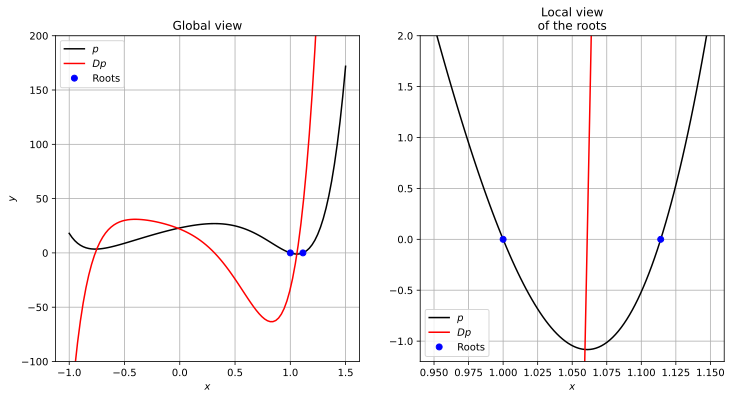

In [47]:
# find the derivative
Dp = p.deriv()

# domains and ranges for the graphs
x1 = np.linspace(-1, 1.5, 100)
y1 = p(x1)

x2 = np.linspace(0.95, 1.15, 100)
y2 = p(x2)

# figure configs:
# Define two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# All functions and points to be graphed
# in the first subplot
ax1.plot(x1, y1, 'k-', label='$p$')
ax1.plot(x1, Dp(x1), 'r-', label='$Dp$')
ax1.plot(r_roots, p(r_roots), 'bo', label='Roots')

# Set titles, domain ranges, and labels
ax1.set_title('Global view')
ax1.set_ylim(-100, 200)
ax1.set_ylabel('$y$')
ax1.set_xlabel('$x$')

# generate plots
ax1.grid()
ax1.legend()

# All functions and points to be graphed
# in the second subplot
ax2.plot(x2, y2, 'k-', label='$p$')
ax2.plot(x2, Dp(x2), 'r-', label='$Dp$')
ax2.plot(r_roots, p(r_roots), 'bo', label='Roots')

# Set titles, domain ranges, and labels

ax2.set_title('Local view\nof the roots')
ax2.set_ylim(-1.2, 2)
ax2.set_xlabel('$x$')

# generate plots
ax2.grid()
ax2.legend()

plt.show()

B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones 
1. $$x\operatorname{e}^x=p\,, $$
2. $$\frac{\sin x}{x}=+p\,,$$
3. $$\frac{\sin x}{x}=-p\,,$$
4. $$\frac{\cos x}{x}=+p\,,$$
5. $$\frac{\cos x}{x}=-p\,,$$

III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de $p$.

IV) Encuentre la solución a la ecuación trascendental para el intervalo $x$ entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

In [59]:
# seed with my ID
np.random.seed(1001577699)

# random number within the given range
np.random.randint(1, 5, 1)

array([1])

I choose the first formula.

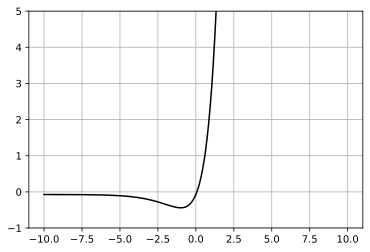

In [52]:
# define the p value
p_val = np.random.uniform(0, 1, 1)

# assign it to our new function,
# whose root will be the desired
# solution
f = lambda x : x*np.exp(x) - p_val

# graph of the function
# f : I = [-10, 10] -> f(I);
# just to provide some intuition
x = np.linspace(-10, 10, 1000)
y = f(x)

plt.plot(x, y, 'k-')
plt.ylim(-1, 5)
plt.grid()
plt.show()

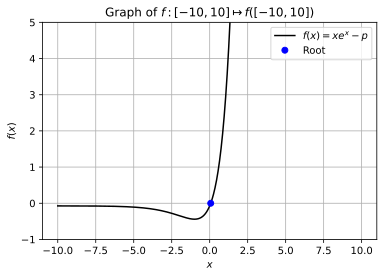

In [56]:
# now we find the root!
root = optimize.newton(f, x0=1)

# plot a better graph:
# Define the function and its root
plt.plot(x, y, 'k-', label='$f(x) = xe^{x} - p$')
plt.plot(root, f(root), 'bo', label='Root')

# spice the plot up
plt.ylim(-1, 5)
plt.title('Graph of $f : [-10, 10] \mapsto f([-10, 10])$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid()
plt.legend()

plt.show()